# Установка необходимых пакетов и импорт библиотек

In [1]:
!pip install --upgrade matplotlib > None

In [2]:
!pip install basemap > None

In [4]:
!pip install basemap-data-hires > None

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Data Intro

In [125]:
#Считываем наш замечательный датасет в pandas dataframe

df = pd.read_csv('datasets/NY-House-Dataset.csv')

In [126]:
#Показываем пример наших данных

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [127]:
#Просмотрели нет ли дупликатов - они отсутствуют


df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
4796    False
4797    False
4798    False
4799    False
4800    False
Length: 4801, dtype: bool

In [128]:
#Посмотрим на размер наших данных
#17 признаков и 4801 запись

df.shape

(4801, 17)

In [129]:
#Смотрим на типы данных признаков

df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [130]:
#Смотрим на пропуски в данных (благо они отсутствуют)

df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

# Numerical Columns

In [131]:
#Отбираем столбцы с числовыми признаками и с категориальными соответственно

num_cols = df.select_dtypes(exclude='object')
cat_cols = df.select_dtypes(include='object')

In [132]:
#Получаем информацию о числовых признаках и видим, что у них различается масштаб

num_cols.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [133]:
#Получаем информацию о категориальных признаках

cat_cols.describe()

,BROKERTITLE,TYPE,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS
count,4801,4801,4801,4801,4801,4801,4801,4801,4801,4801,4801
unique,1036,13,4582,308,4583,29,11,21,174,2731,4550
top,Brokered by COMPASS,Co-op for sale,2619 Shore Pkwy,"Brooklyn, NY 11235","2619 Shore PkwyBrooklyn, NY 11223",United States,New York,New York,Manhattan,2,"61-20 Grand Central Pkwy, Forest Hills, NY 113..."
freq,456,1450,3,102,3,2484,2505,1016,979,20,4


# Geospatial data visualization

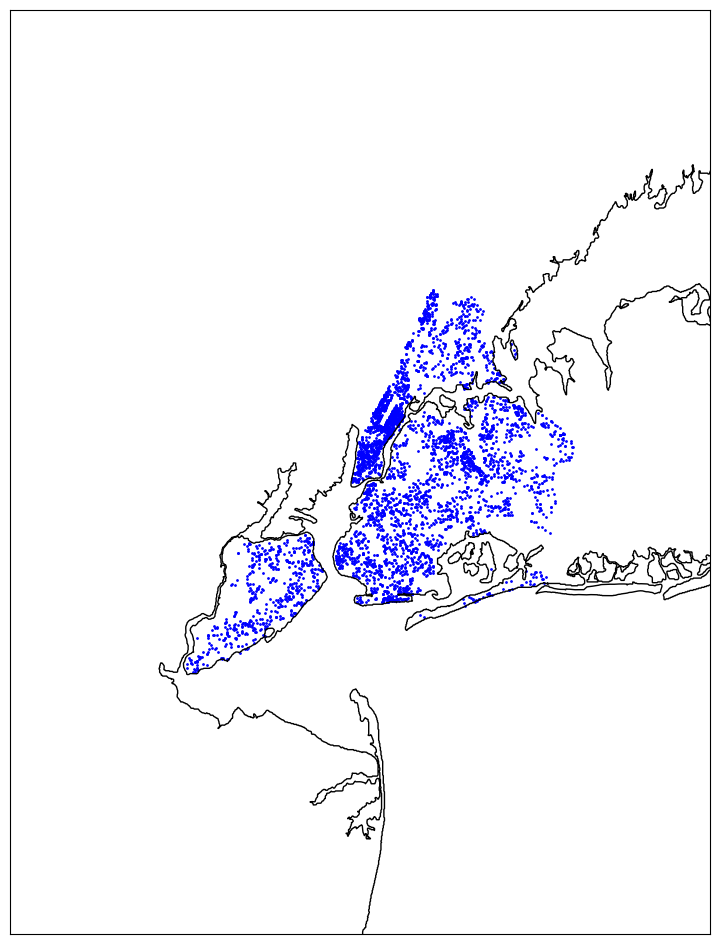

In [36]:
#Теперь отобразим наш прекрасный Нью-Йорк и его квартиры!!!


plt.figure(1, figsize=(20,12))
lat, lon = 40.71427, -74.00597
m = Basemap(projection='merc',llcrnrlat=lat-0.5, urcrnrlat=lat+0.5, llcrnrlon=lon-0.5, urcrnrlon=lon+0.5, resolution='f')
m.drawcoastlines()
m.drawcountries()
m.drawrivers()
mxy = m(df['LONGITUDE'].tolist(), df['LATITUDE'].tolist())
m.scatter(mxy[0], mxy[1], marker='o', color='blue', s=1, label='Точки')

plt.show()

# Encoding categorical features

In [134]:
#Закодируем категориальные признаки с помощью LabelEncoder

le = LabelEncoder()

df_copy = df.copy()

for col in cat_cols:
    df_copy[col] = le.fit_transform(cat_cols[col])

    
df_copy.head()



,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,296,2,315000,2,2.000000,1400.0,1421,207,1421,26,4,10,56,2427,4541,40.761255,-73.974483
1,907,2,195000000,7,10.000000,17545.0,4576,205,4577,28,4,12,117,2679,1647,40.766393,-73.980991
2,927,7,260000,4,2.000000,2015.0,3684,301,3684,28,4,16,153,2507,3625,40.541805,-74.196109
3,179,2,69000,3,1.000000,445.0,1423,161,1423,28,4,12,117,1894,1407,40.761398,-73.974613
4,923,12,55000000,7,2.373861,14175.0,3278,227,3278,28,4,12,117,1903,3228,40.767224,-73.969856


# Outliers

In [135]:
#Посмотрим на графики выбросов, диаграммы boxplot

df_copy.sort_values('PRICE', ascending=False)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
304,14,7,2147483647,7,6.000000,10000.000000,3818,233,3818,28,4,16,153,1515,3759,40.518484,-74.224418
1,907,2,195000000,7,10.000000,17545.000000,4576,205,4577,28,4,12,117,2679,1647,40.766393,-73.980991
69,923,12,65000000,3,2.373861,15200.000000,2857,229,2857,28,4,12,117,1917,2809,40.776561,-73.963317
1075,179,0,60000000,8,8.000000,2184.207862,4506,182,4507,25,5,11,101,1463,4439,40.775642,-73.964247
141,307,7,56000000,11,10.000000,24000.000000,4377,205,4378,28,4,12,117,2677,4311,40.761600,-73.976191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,179,2,60000,3,1.000000,445.000000,1422,161,1422,25,5,11,101,439,1406,40.761398,-73.974613
463,670,0,49500,3,2.373861,800.000000,844,32,844,25,0,20,35,259,829,40.843284,-73.784603
360,198,8,5800,3,2.373861,2184.207862,3148,78,3148,25,3,1,69,989,3101,40.618915,-73.931211
310,616,5,3225,3,1.000000,2184.207862,3719,217,3719,25,5,11,101,1156,3660,40.843406,-73.940795


In [136]:
#Посмотрим на описание признаков

df_copy.describe()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
count,4801.000000,4801.000000,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,479.034160,4.863778,2.356940e+06,3.356801,2.373861,2184.207862,2295.438242,145.621329,2295.605707,26.443033,4.402624,10.676317,99.378463,1284.515934,2279.232035,40.714227,-73.941601
std,303.273607,4.340049,3.135525e+07,2.602315,1.946962,2377.140894,1322.447182,92.871180,1322.688646,2.116536,1.518821,5.123618,46.093269,779.775744,1313.325737,0.087676,0.101082
min,0.000000,0.000000,2.494000e+03,1.000000,0.000000,230.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.499546,-74.253033
25%,203.000000,0.000000,4.990000e+05,2.000000,1.000000,1200.000000,1152.000000,64.000000,1152.000000,25.000000,4.000000,9.000000,71.000000,613.000000,1144.000000,40.639375,-73.987143
50%,389.000000,4.000000,8.250000e+05,3.000000,2.000000,2184.207862,2298.000000,122.000000,2298.000000,28.000000,4.000000,11.000000,101.000000,1230.000000,2278.000000,40.726749,-73.949189
75%,789.000000,10.000000,1.495000e+06,4.000000,3.000000,2184.207862,3443.000000,213.000000,3443.000000,28.000000,5.000000,14.000000,133.000000,1927.000000,3420.000000,40.771923,-73.870638
max,1035.000000,12.000000,2.147484e+09,50.000000,50.000000,65535.000000,4581.000000,307.000000,4582.000000,28.000000,10.000000,20.000000,173.000000,2730.000000,4549.000000,40.912729,-73.702450


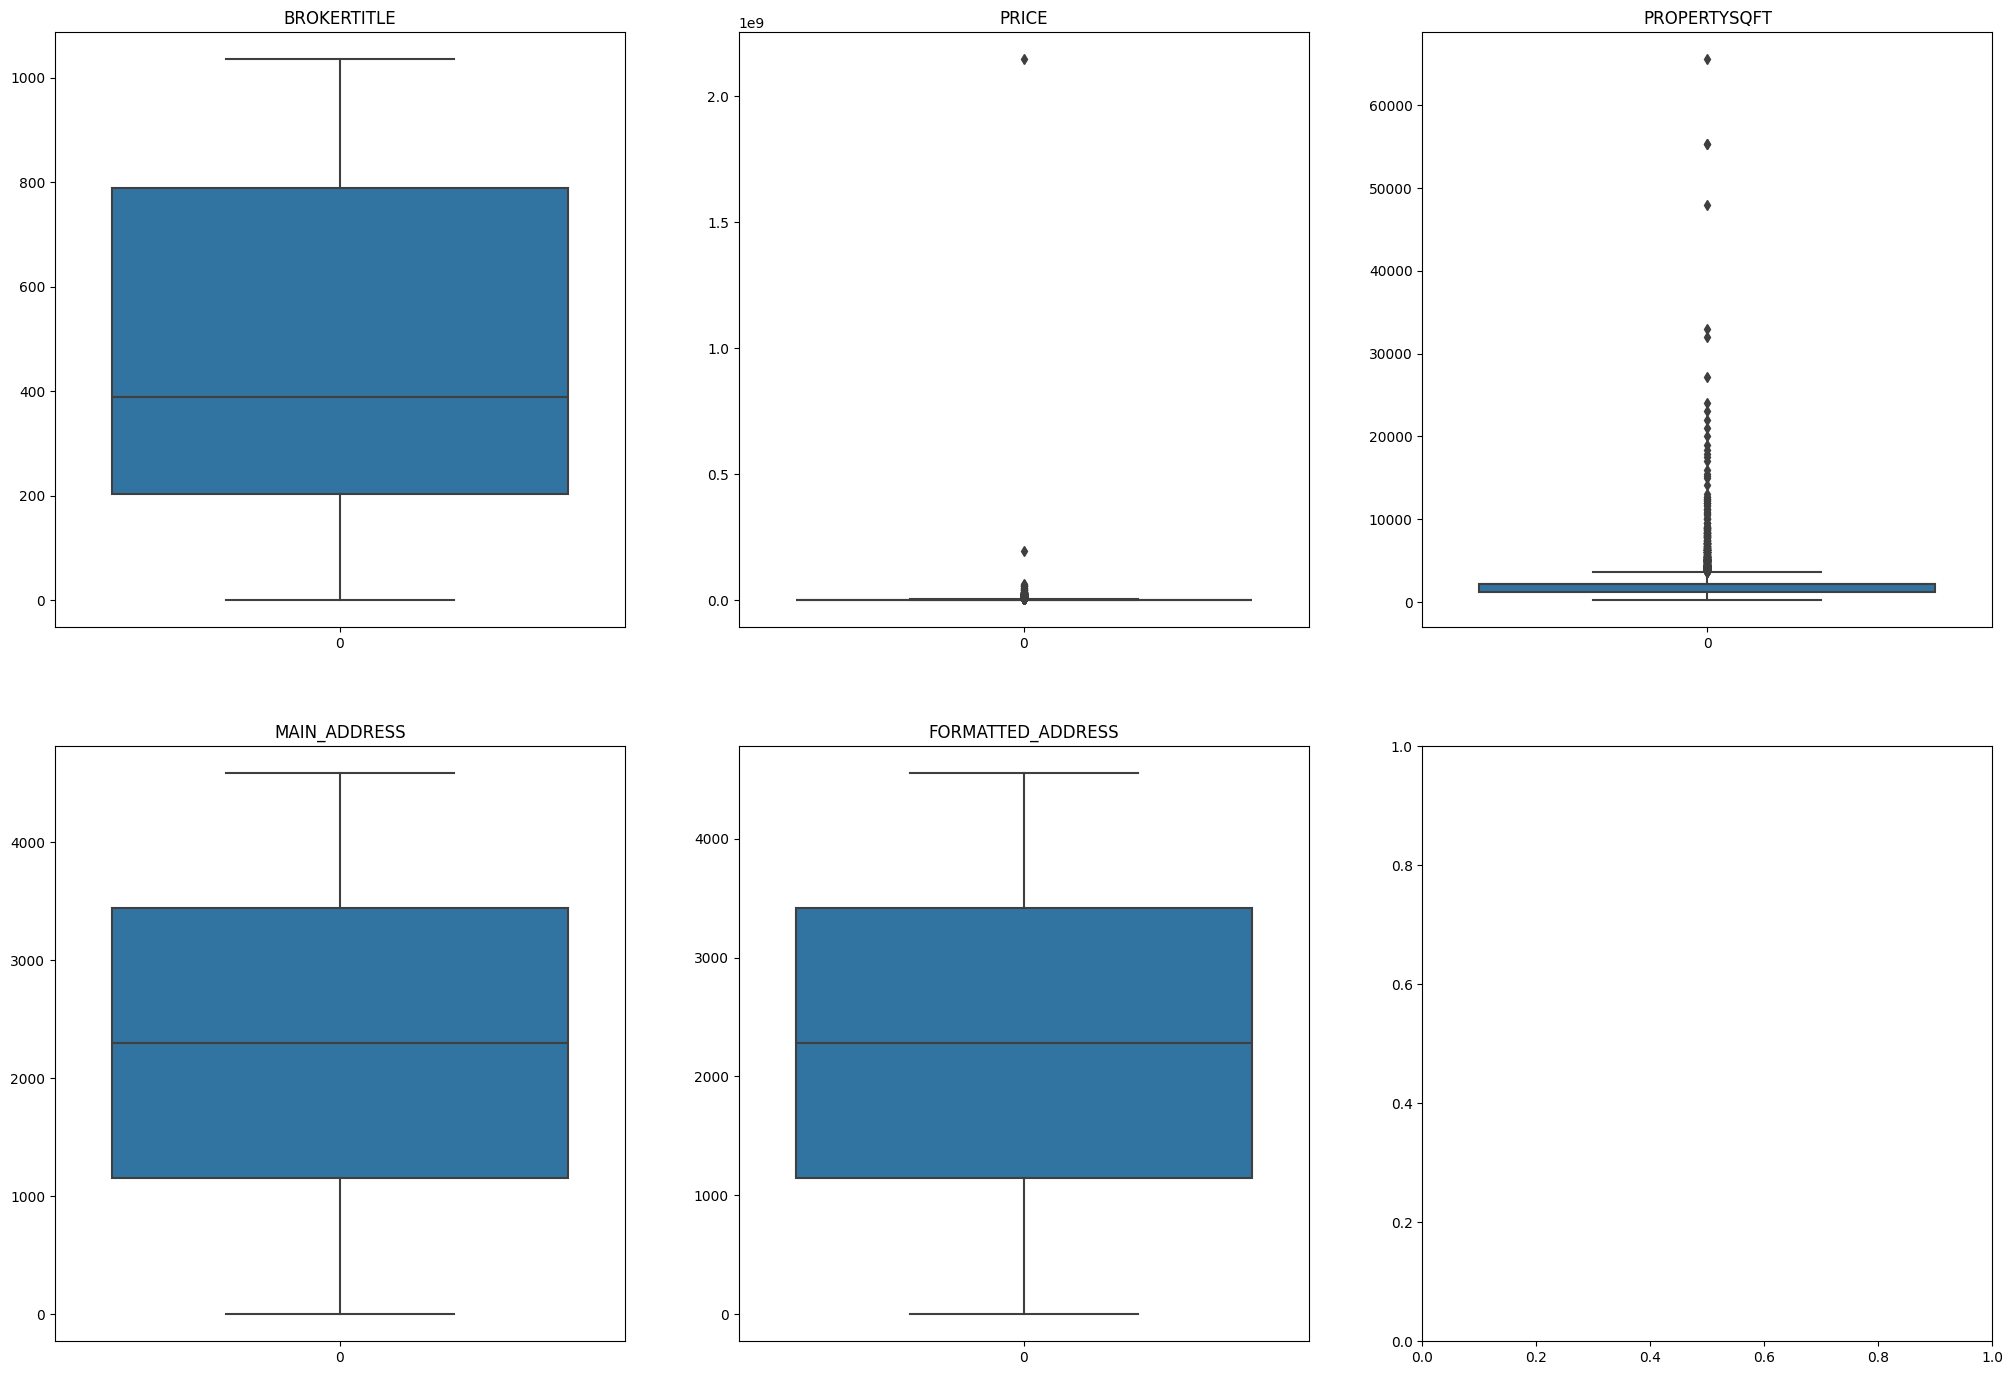

In [137]:
#Как мы видим по нашим коробкам, есть цены и площади квартиры, которые являются аномальными

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 17))

box_cols = ['BROKERTITLE', 'PRICE', 'PROPERTYSQFT', 'MAIN_ADDRESS', 'FORMATTED_ADDRESS']

for index, col in enumerate(box_cols):
    sns.boxplot(df_copy[col], ax=axes[index // 3, index % 3]).set_title(col)

In [138]:
#Удалим выбросы из нашего датафрейма

nums = num_cols.columns

q_low = df_copy[nums[0]].quantile(0.01)
q_hi  = df_copy[nums[0]].quantile(0.99)

df_filtered = df_copy[(df_copy[nums[0]] < q_hi) & (df_copy[nums[0]] > q_low)]

for col in nums[1:]:
    q_low = df_filtered[col].quantile(0.01)
    q_hi  = df_filtered[col].quantile(0.99)
    
    df_filtered = df_filtered[(df_filtered[col] <= q_hi) & (df_filtered[col] >= q_low)]

df_filtered.shape

(4343, 17)

In [139]:
#Мы видим, что смотря через квантили - потеряли целых 400 строк, 
#что достаточно много, давайте попробуем избавиться от выбросов через z-score
#Тем более по наблюдениям можно сказать, что выбросы есть только у цены квартиры

z_score = stats.zscore(df_copy['PRICE'])

df_filtered = df_copy[np.abs(z_score) <= 3]

df_filtered.shape

(4799, 17)

# Scaling

In [140]:
#А также отнормируем признаки с помощью MinMaxScaler

mm = MinMaxScaler()

df_filtered = pd.DataFrame(mm.fit_transform(df_filtered), columns=df.columns)

df_filtered

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,0.285990,0.166667,0.004808,0.020408,0.040000,0.017916,0.310194,0.674267,0.310127,0.928571,0.4,0.50,0.323699,0.889011,0.998241,0.633396,0.505918
1,0.895652,0.583333,0.003962,0.061224,0.040000,0.027333,0.804191,0.980456,0.804016,1.000000,0.4,0.80,0.884393,0.918315,0.796878,0.102276,0.103390
2,0.172947,0.166667,0.001023,0.040816,0.020000,0.003292,0.310631,0.524430,0.310563,1.000000,0.4,0.60,0.676301,0.693773,0.309299,0.633742,0.505683
3,0.891787,1.000000,0.846148,0.122449,0.047477,0.213536,0.715564,0.739414,0.715408,1.000000,0.4,0.60,0.676301,0.697070,0.709607,0.647842,0.514322
4,0.895652,0.583333,0.010577,0.081633,0.040000,0.057790,0.774285,0.267101,0.774116,1.000000,0.4,0.45,0.144509,0.866300,0.768081,0.423098,0.534539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,0.172947,0.000000,0.009177,0.000000,0.020000,0.029924,0.375027,0.592834,0.374945,0.892857,0.5,0.55,0.583815,0.196337,0.372829,0.665089,0.539708
4795,0.636715,0.000000,0.003731,0.000000,0.020000,0.029924,0.987121,0.908795,0.987124,1.000000,0.4,0.70,0.768786,0.420879,0.980215,0.563894,0.713574
4796,0.296618,0.000000,0.019578,0.000000,0.020000,0.029924,0.660991,0.644951,0.660847,1.000000,0.4,0.60,0.676301,0.974725,0.654869,0.596189,0.453402
4797,0.324638,0.166667,0.009164,0.020408,0.020000,0.006508,0.963982,0.315961,0.963990,0.892857,0.7,0.65,0.410405,0.526007,0.955814,0.588660,0.690689


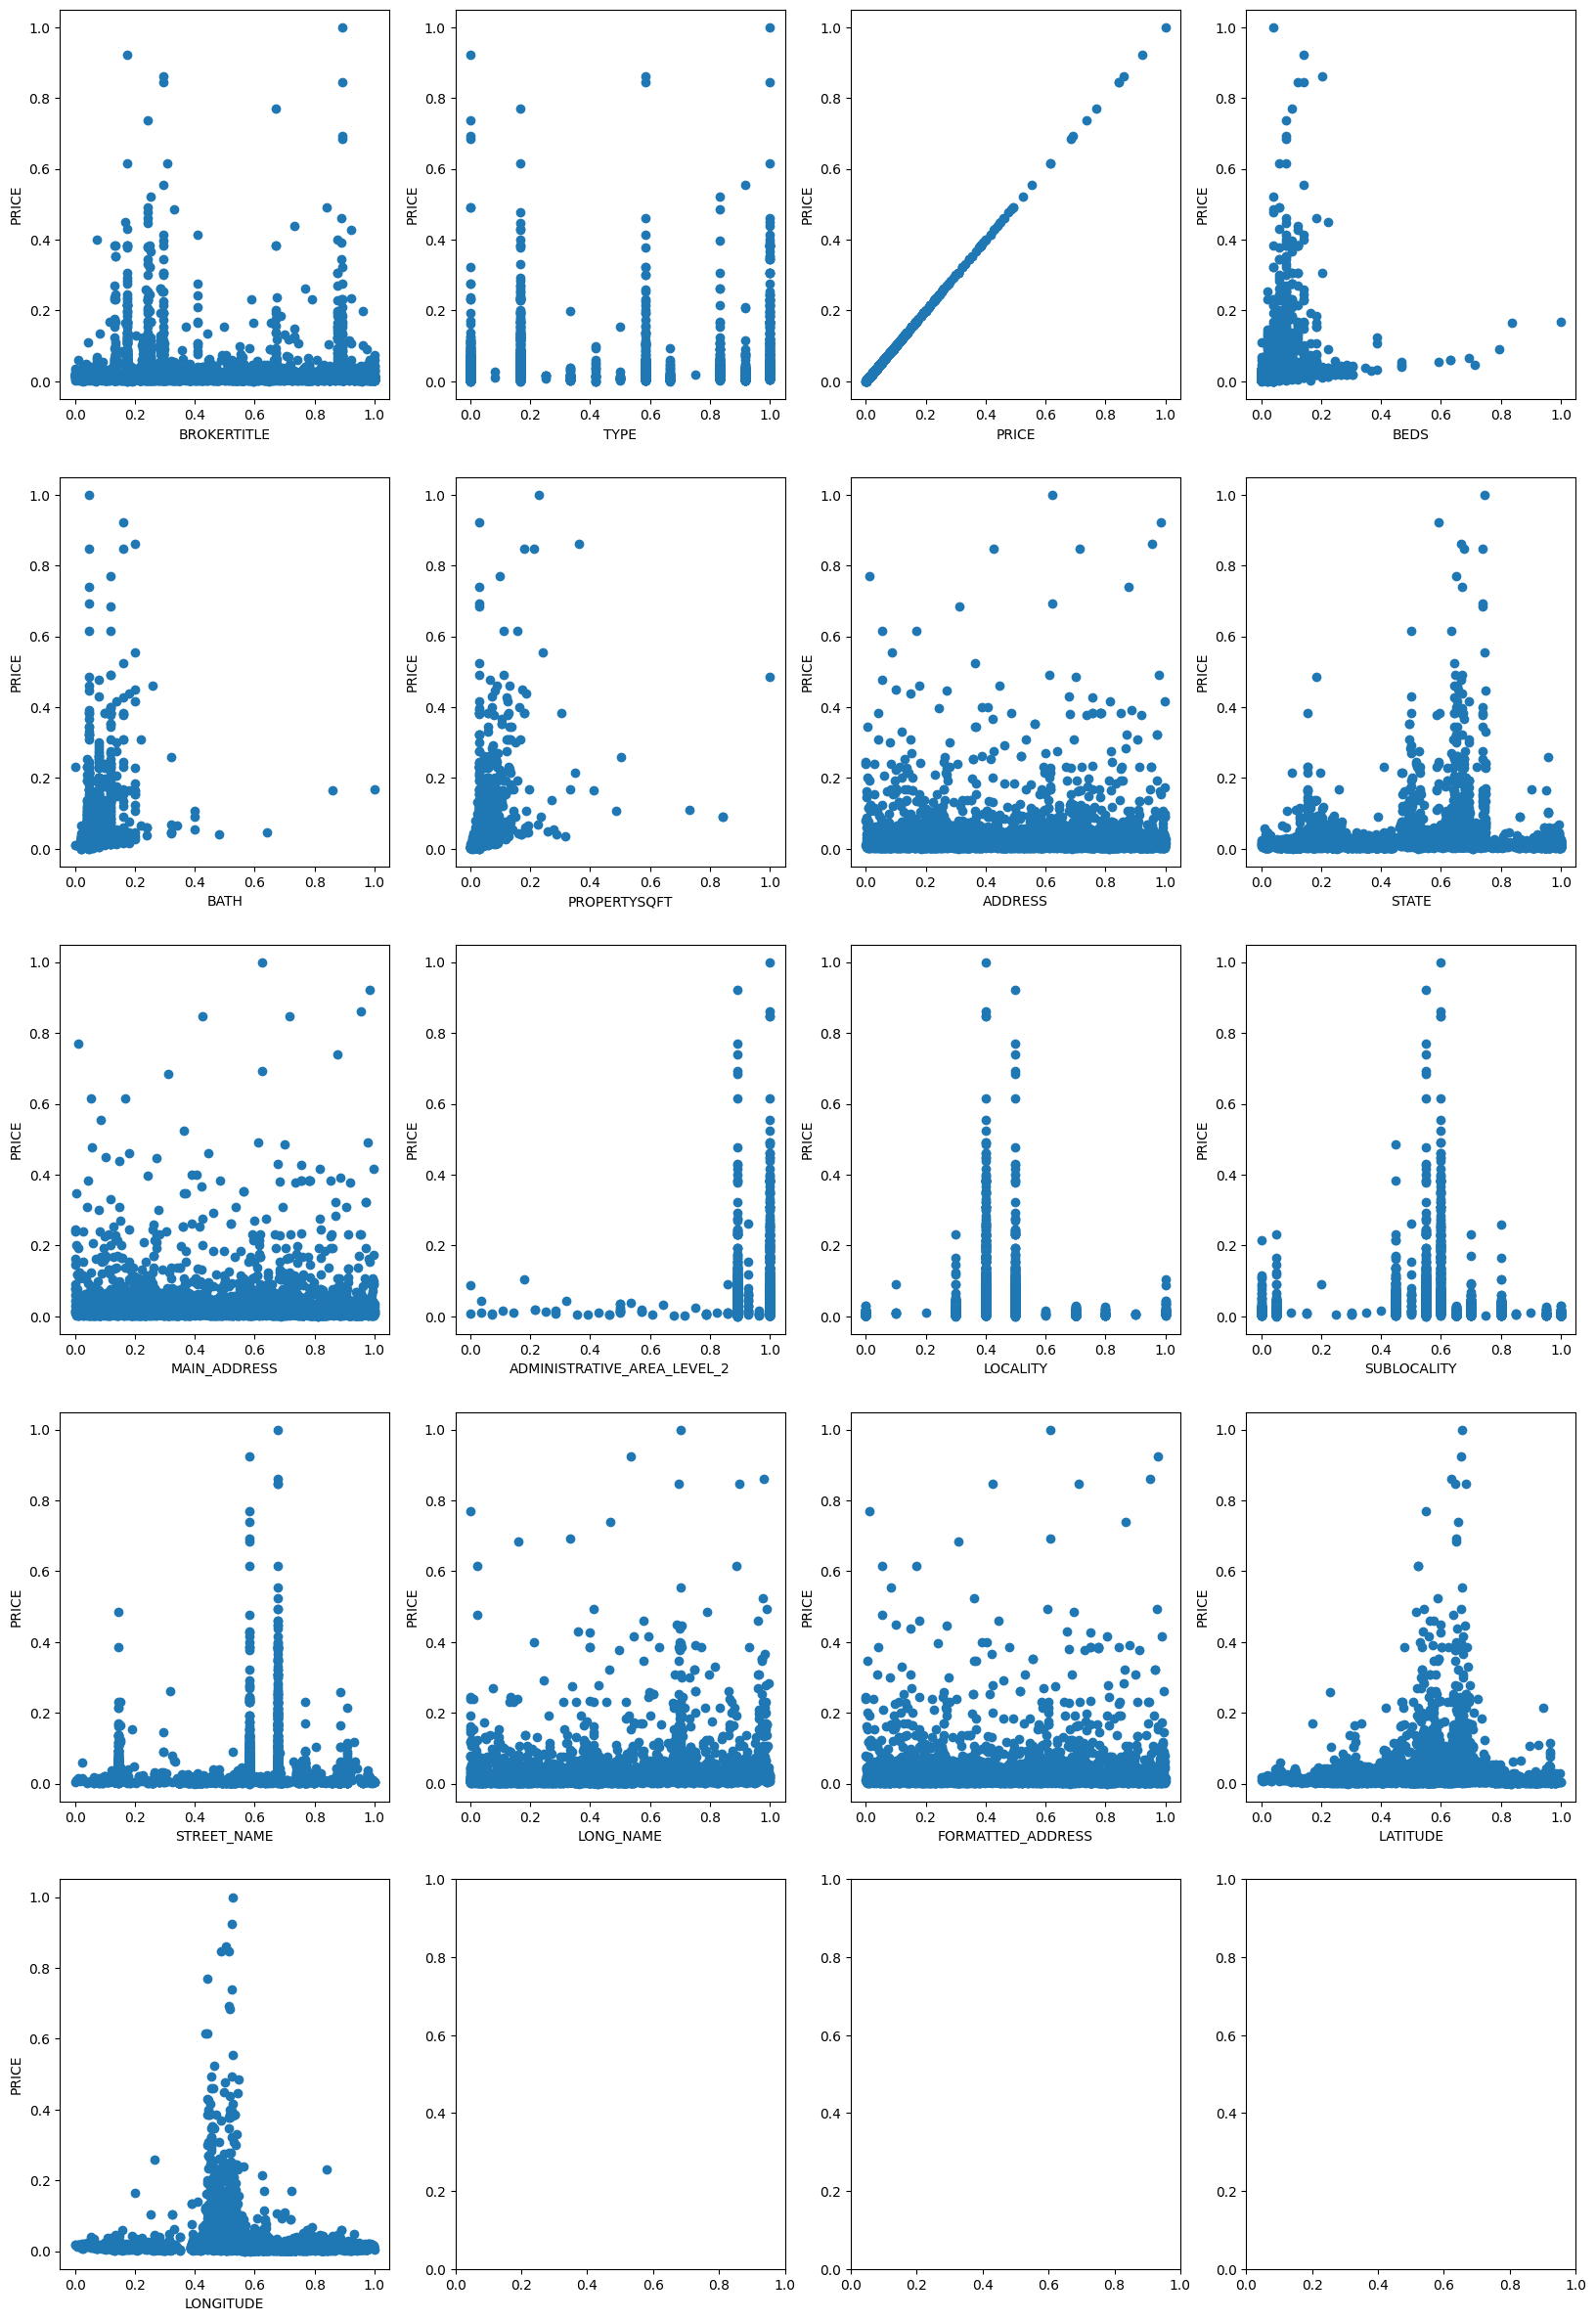

In [141]:
figure, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))
price_col = df_filtered['PRICE']

for index, feature in enumerate(df_filtered.columns):
    axes[index // 4, index % 4].scatter(df_filtered[feature], price_col)
    axes[index // 4, index % 4].set_xlabel(feature)
    axes[index // 4, index % 4].set_ylabel('PRICE')

In [142]:
df_filtered

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,0.285990,0.166667,0.004808,0.020408,0.040000,0.017916,0.310194,0.674267,0.310127,0.928571,0.4,0.50,0.323699,0.889011,0.998241,0.633396,0.505918
1,0.895652,0.583333,0.003962,0.061224,0.040000,0.027333,0.804191,0.980456,0.804016,1.000000,0.4,0.80,0.884393,0.918315,0.796878,0.102276,0.103390
2,0.172947,0.166667,0.001023,0.040816,0.020000,0.003292,0.310631,0.524430,0.310563,1.000000,0.4,0.60,0.676301,0.693773,0.309299,0.633742,0.505683
3,0.891787,1.000000,0.846148,0.122449,0.047477,0.213536,0.715564,0.739414,0.715408,1.000000,0.4,0.60,0.676301,0.697070,0.709607,0.647842,0.514322
4,0.895652,0.583333,0.010577,0.081633,0.040000,0.057790,0.774285,0.267101,0.774116,1.000000,0.4,0.45,0.144509,0.866300,0.768081,0.423098,0.534539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,0.172947,0.000000,0.009177,0.000000,0.020000,0.029924,0.375027,0.592834,0.374945,0.892857,0.5,0.55,0.583815,0.196337,0.372829,0.665089,0.539708
4795,0.636715,0.000000,0.003731,0.000000,0.020000,0.029924,0.987121,0.908795,0.987124,1.000000,0.4,0.70,0.768786,0.420879,0.980215,0.563894,0.713574
4796,0.296618,0.000000,0.019578,0.000000,0.020000,0.029924,0.660991,0.644951,0.660847,1.000000,0.4,0.60,0.676301,0.974725,0.654869,0.596189,0.453402
4797,0.324638,0.166667,0.009164,0.020408,0.020000,0.006508,0.963982,0.315961,0.963990,0.892857,0.7,0.65,0.410405,0.526007,0.955814,0.588660,0.690689


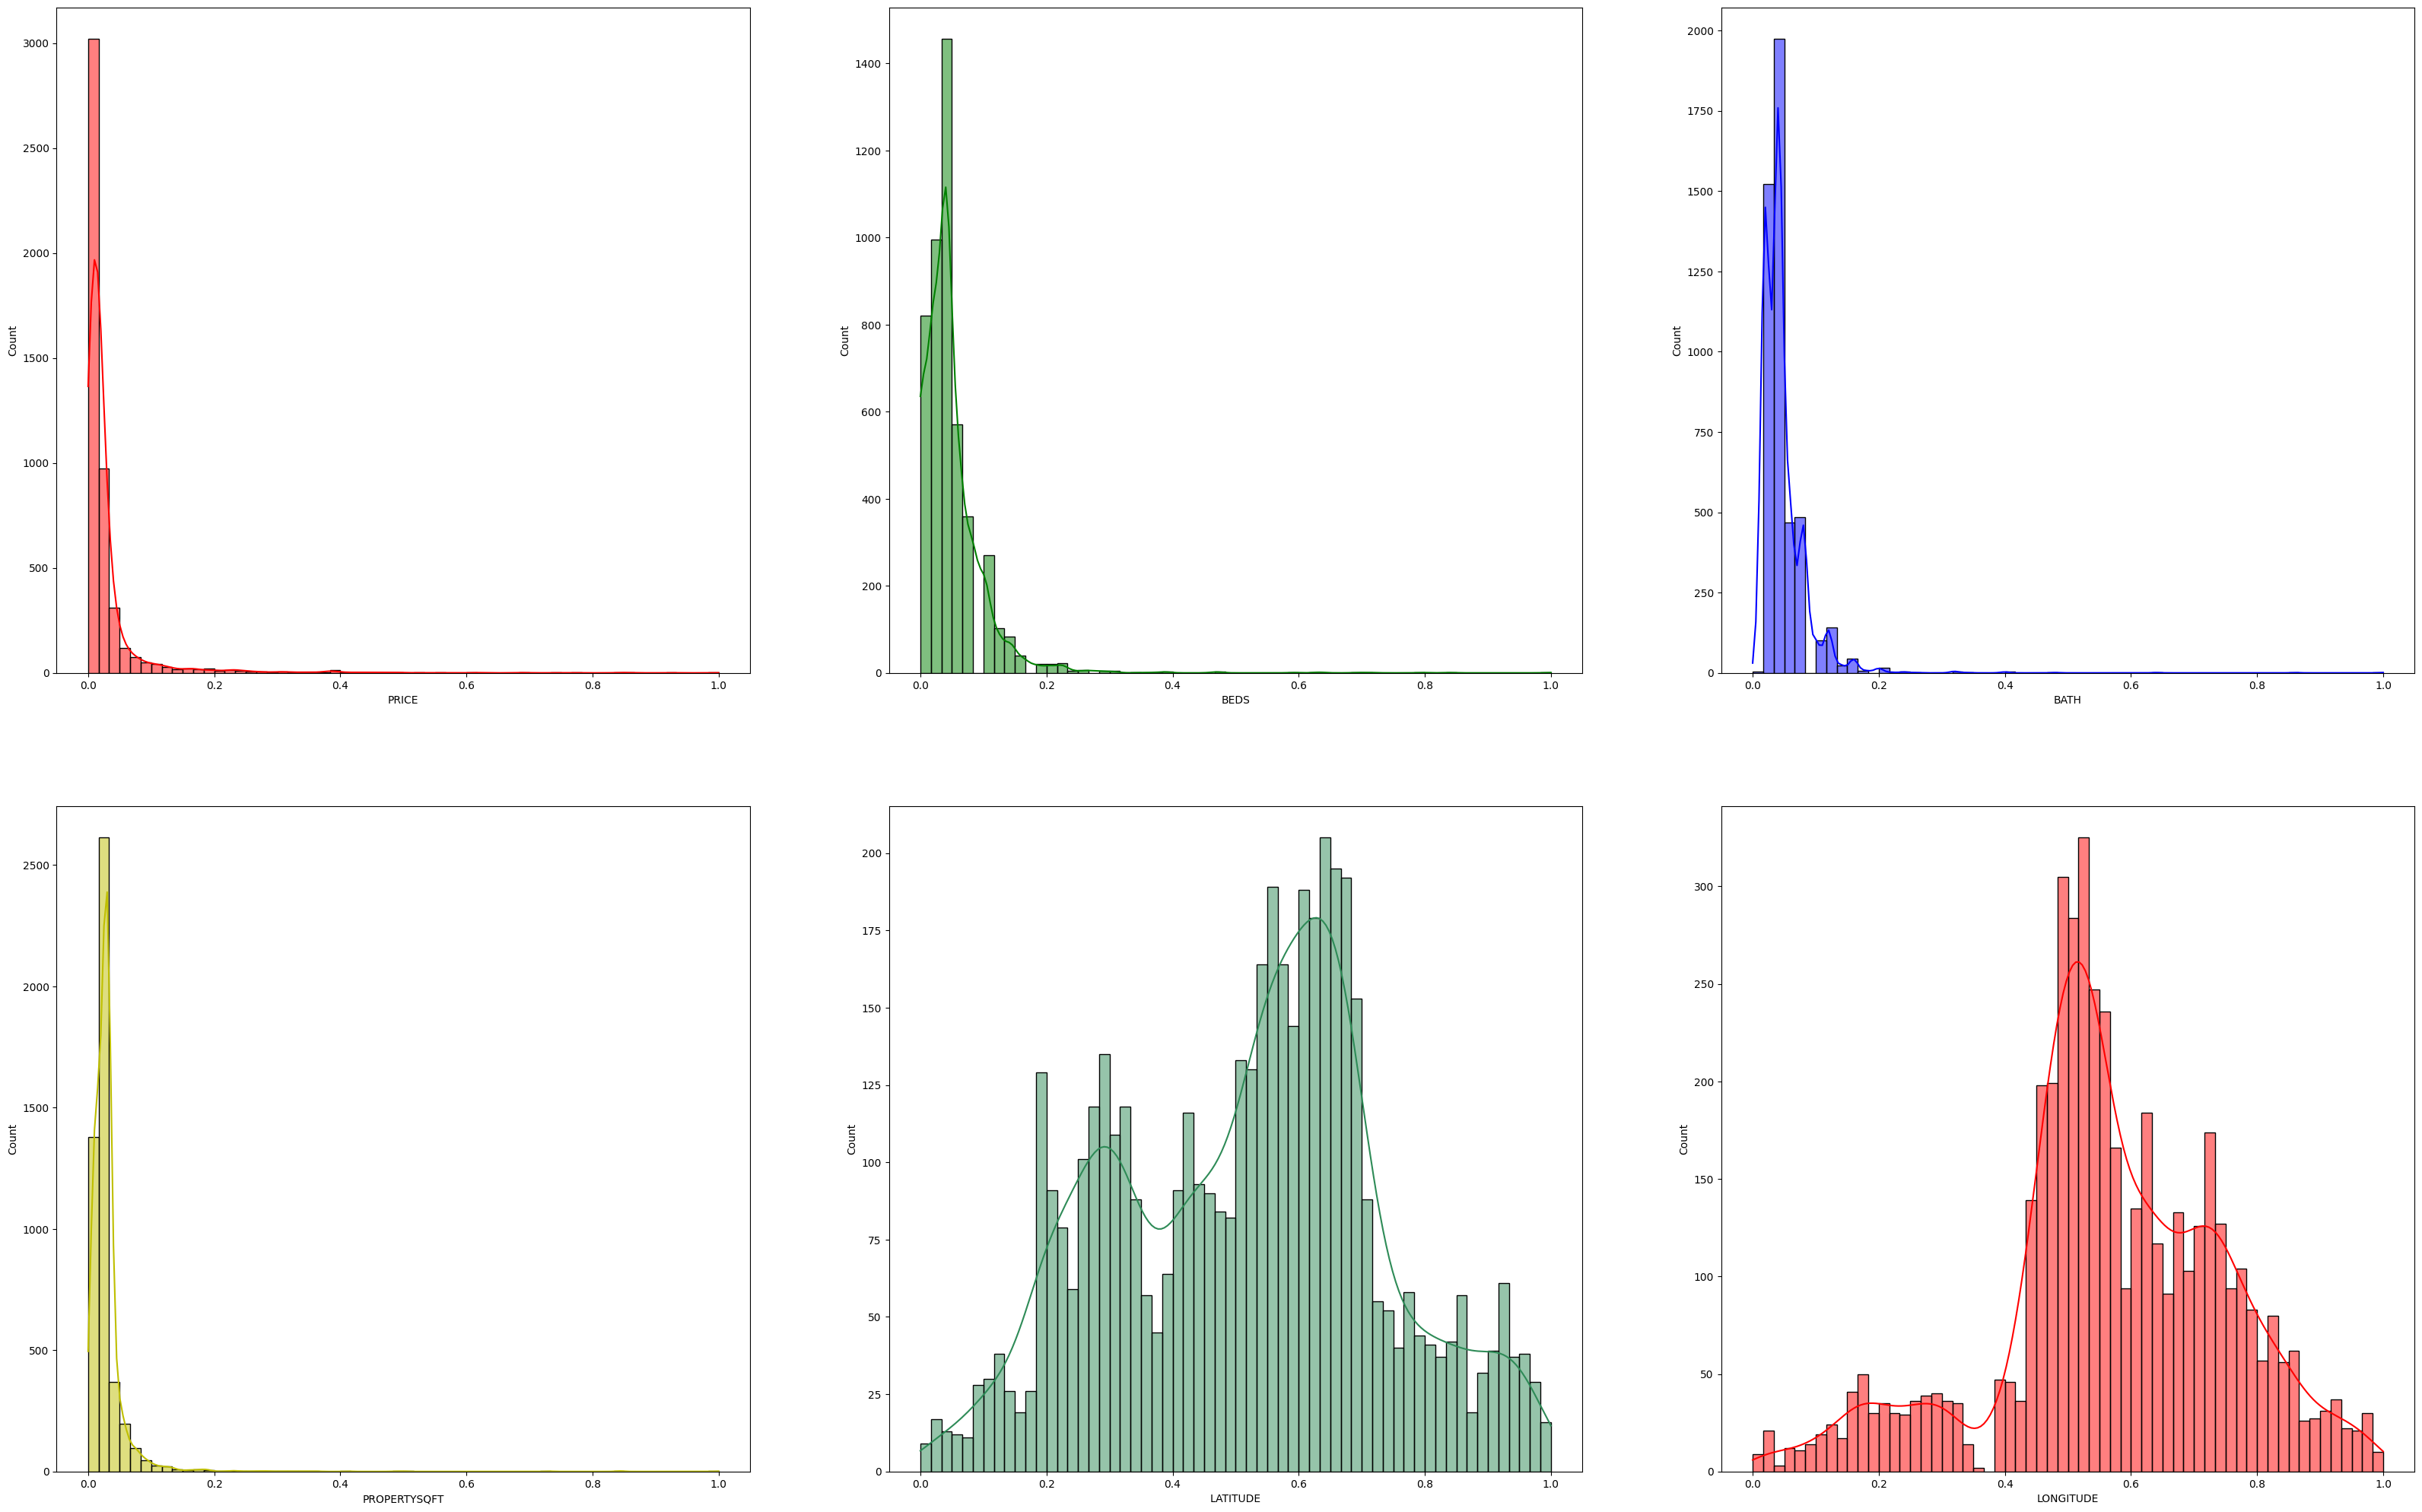

In [143]:
#Отобраазим распределение числовых признаков

num_cols = df_filtered.loc[:, ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 25))
colors = ['r', 'g', 'b', 'y', 'seagreen', 'r']

for index, col in enumerate(num_cols.columns):
    sns.histplot(data=num_cols[col], bins=60, kde=True, ax=axes[index // 3, index % 3], color=colors[index])

<Axes: >

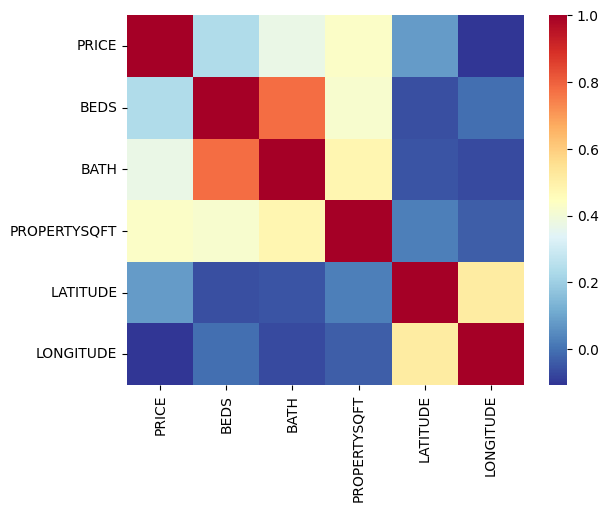

In [144]:
#Изобразим матрицу корреляций числовых признаков, благодаря тепловой карте

sns.heatmap(num_cols.corr(), cmap='RdYlBu_r')

In [113]:
#Используем метод главных компонент для более детализированного трехмерного графика

model = PCA(n_components=3)
num_cols_pca = model.fit_transform(num_cols)

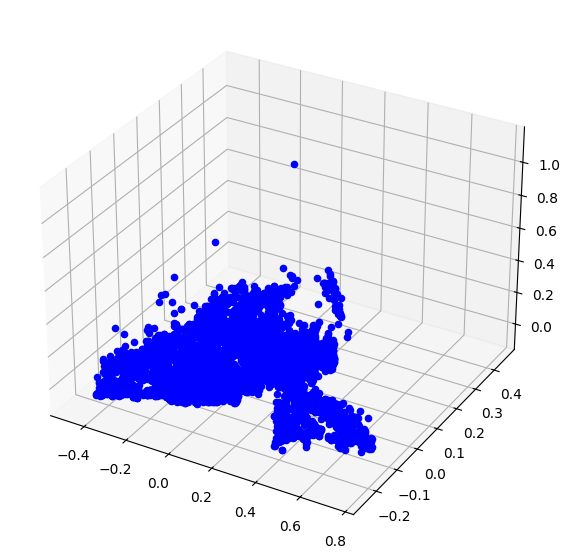

In [114]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111, projection='3d')

for col in num_cols_pca:
    ax.scatter(col[0], col[1], col[2], c='b')
    
plt.show()

In [145]:
num_cols.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000,4799.000000
mean,0.028729,0.048067,0.047430,0.029850,0.519650,0.565762
std,0.062551,0.053098,0.038871,0.036208,0.212121,0.183477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007639,0.020408,0.020000,0.014853,0.338640,0.482924
50%,0.012654,0.040816,0.040000,0.029924,0.549885,0.551883
75%,0.022963,0.061224,0.060000,0.029924,0.659220,0.694528
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creation of Baseline Model, choice of metric

In [151]:
#Нашей бейзлайновой моделью будет являться линейная регрессия
#Метрикой для линейной регрессии была выбрана MSE - mean squared error
#Обоснование выбора метрики следующее - несмотря на удаление выбросов и нормализацию данных в датасете 
#разброс данных все равно у некоторых признаков достаточно не маленький, чем больше будет отклонение - тем больше будет штраф,
#чем меньше отклонение, тем штраф меньше, так как MSE возвращает штраф в квадрате

lr = LinearRegression()
df_new = df_filtered.copy()

y = df_new['PRICE'].to_numpy()
X = df_new.loc[:, df_new.columns != 'PRICE'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Итоговая метрика MSE: {-1*scores.mean()}")

Итоговая метрика MSE: 0.0030038539301404468
